<a href="https://colab.research.google.com/github/WaleedAhmedSiddiqui/Loan_Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as py
import numpy as np

In [6]:
df = pd.read_csv("train_Loan.csv")

In [7]:
df.describe()

#inferences-
#1. some values in Loanamount, loanamountterm and credit history is missing.
#2. mean>median, rightwards skew.
#If skew present operations can't be executed directly. Data needs to be cleaned first.
#4. Since mean of credit history column is 0.842 with binary values of 1 and 0, 84.2% people have a credit history.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.shape

(614, 13)

In [9]:
df['Property_Area'].value_counts() #frequency table

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

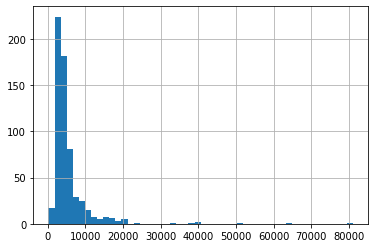

In [10]:
"""Inference- Most applicants are from Urban and semi-urban area."""
df['ApplicantIncome'].hist(bins=50)

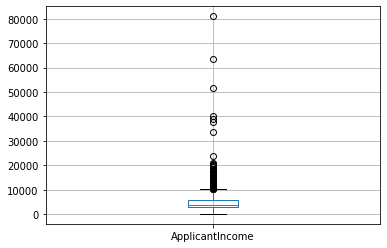

In [11]:
"""Inference-Bulk of applicants have income less than 10000"""
df.boxplot(column='ApplicantIncome')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


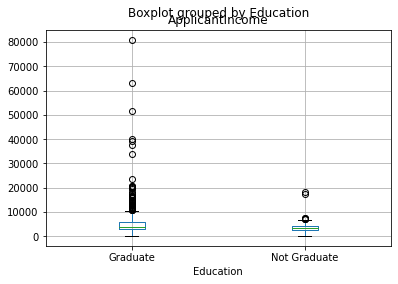

In [12]:
"""The two black linnes show maximum and minimum value, the box shows 1st and 3rd quartile, the green line shows 50 percentile"""
df.boxplot(column='ApplicantIncome',by ='Education')

In [13]:
"""Inference- if a person is a graduate, the person has a higher chance of earning substantially more money than non- graduates."""

'Inference- if a person is a graduate, the person has a higher chance of earning substantially more money than non- graduates.'

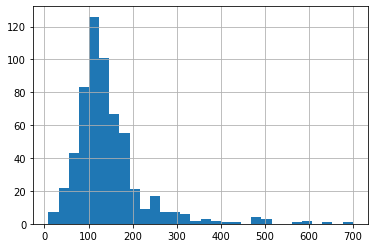

In [14]:
df["LoanAmount"].hist(bins=30)

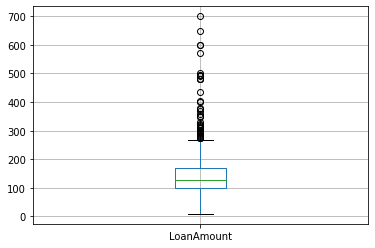

In [15]:
"""Positive skew"""
df.boxplot(column='LoanAmount')

In [16]:
temp1 = df['Credit_History'].value_counts(ascending=True) 
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()) 
print ('Frequency Table for Credit History:' )
print (temp1 )
print ('\nProbility of getting loan for each Credit History class:' )
print( temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


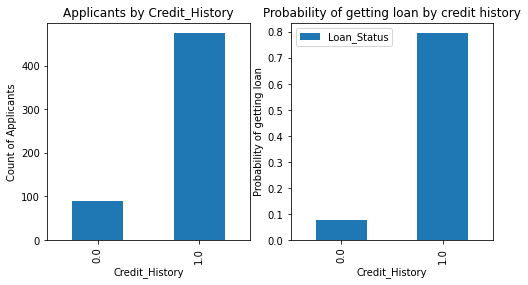

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar',ax=ax1)

ax2 = fig.add_subplot(122)

ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind = 'bar',ax=ax2)

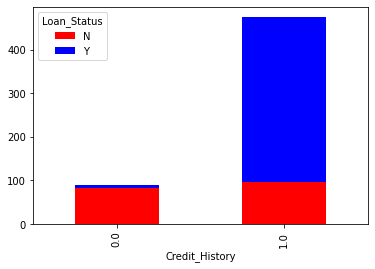

In [18]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status']) 
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [19]:
#DATA MUNGING using pandas.
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df.shape

(614, 13)

In [21]:
#close to 25% data is missing. Hence can't delete data. Replacing values:
#Only one numerical column- loan amount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df['Self_Employed'].value_counts()
df['Self_Employed'].fillna('No',inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df['Gender'].value_counts()
df['Gender'].fillna('Male',inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
df['Dependents'].fillna("0",inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [28]:
df['Married'].fillna('yes',inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
df['Loan_Amount_Term'].fillna("360.0",inplace=True)
df.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df['Credit_History'].value_counts()
df['Credit_History'].fillna("360.0",inplace=True)
df.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

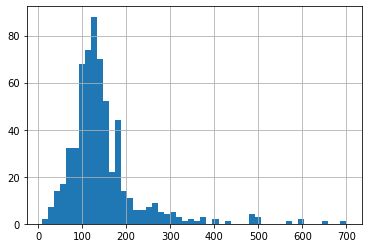

In [32]:
#TREATING FOR EXTREME VALUES
df['LoanAmount'].hist(bins=50)

In [33]:
#using log-trasformation to normalise the data.
df['LoanAmount_log'] = np.log(df['LoanAmount'])

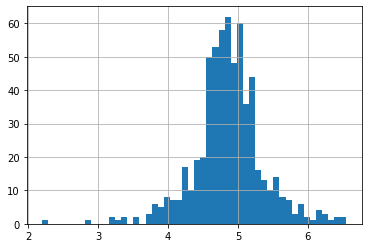

In [34]:
df['LoanAmount_log'].hist(bins=50)

In [35]:
#As it can be seen, the distribution has become much more normalised.

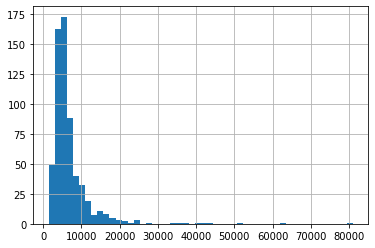

In [36]:
#Merging two columns into one for efficiency-
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'].hist(bins=50)

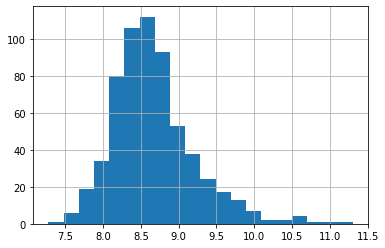

In [37]:
#using log-trasformation to normalise the data.
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)
#DATA MUNGING COMPLETED

In [38]:
#MODELLING using scikit-learn

In [39]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [40]:
df.isnull().sum() 
#to check whether any NaN values are present.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in var_mod:
    df[i] = le.ﬁt_transform(df[i].astype(str))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


In [43]:
#importing ML Algorithms
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import KFold 

from sklearn.ensemble import RandomForestClassifier 

from sklearn import metrics 

In [44]:
#Generic function for making a classification model and accessing performance: 
def classification_model(model, data, predictors, outcome):  
     
    model.fit(data[predictors],data[outcome])    
    
    predictions = model.predict(data[predictors])    
    
    accuracy = metrics.accuracy_score(predictions,data[outcome])  
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    
    kf = KFold(5,shuffle=True)  
    error = []  
    for train, test in kf.split(data):
          
        train_predictors = (data[predictors].iloc[train,:])   
        
        train_target = data[outcome].iloc[train]        
           
        model.fit(train_predictors, train_target)        
        
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))) 
 

In [45]:
#using logistic regression-
outcome_var = 'Loan_Status' 
model = LogisticRegression() 
predictor_var = ['Credit_History']  
classification_model(model, df,predictor_var,outcome_var) 

Accuracy : 68.730%
Cross-Validation Score : 68.725%


In [46]:
#using different combinations of variables-
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area'] 
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 67.428%


In [47]:
#using different combinations of variables-
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log'] 
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.735%


In [48]:
#using random tree classifier
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 79.151%


In [49]:
#understanding which variable(s) have the largest impact on the outcome.
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False) 
print(featimp)

Credit_History      0.281930
TotalIncome_log     0.256055
LoanAmount_log      0.218762
Property_Area       0.052018
Loan_Amount_Term    0.048715
Dependents          0.048158
Married             0.028804
Gender              0.023972
Self_Employed       0.021193
Education           0.020394
dtype: float64


In [50]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1) 
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area'] 
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.922%
Cross-Validation Score : 80.628%
